In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./kospi3.csv')
df.head()

,date,close
0,2016-05-25,1961
1,2016-05-24,1938
2,2016-05-23,1955
3,2016-05-20,1948
4,2016-05-19,1947


In [3]:
pd.read_csv('./kospi3.csv', header=0, index_col=0, squeeze=True)

date
2016-05-25    1961
2016-05-24    1938
2016-05-23    1955
2016-05-20    1948
2016-05-19    1947
2016-05-18    1957
2016-05-17    1968
2016-05-16    1968
2016-05-13    1967
2016-05-12    1977
2016-05-11    1980
2016-05-10    1983
2016-05-09    1968
2016-05-04    1977
2016-05-03    1986
2016-05-02    1978
2016-04-29    1994
2016-04-28    2001
2016-04-27    2015
2016-04-26    2020
2016-04-25    2015
2016-04-22    2015
2016-04-21    2022
2016-04-20    2006
2016-04-19    2011
2016-04-18    2009
2016-04-15    2015
2016-04-14    2016
2016-04-12    1981
2016-04-11    1970
2016-04-08    1972
2016-04-07    1974
2016-04-06    1971
2016-04-05    1963
2016-04-04    1979
2016-04-01    1974
2016-03-31    1996
2016-03-30    2002
2016-03-29    1995
2016-03-28    1983
2016-03-25    1984
2016-03-24    1986
2016-03-23    1995
2016-03-22    1997
2016-03-21    1990
2016-03-18    1992
2016-03-17    1988
2016-03-16    1975
2016-03-15    1970
2016-03-14    1972
2016-03-11    1971
2016-03-10    1969
2016-03

<AxesSubplot:xlabel='2016-05-25'>

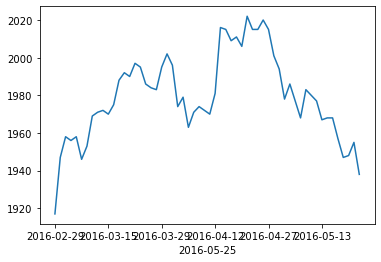

In [4]:
ts = pd.read_csv('./kospi3.csv', header=1, index_col=0, squeeze=True)
ts = ts.sort_index()
ts.plot()

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

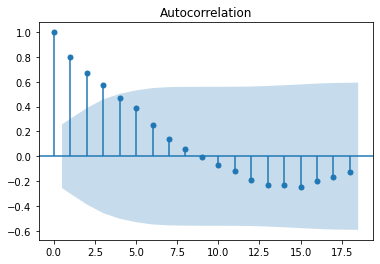

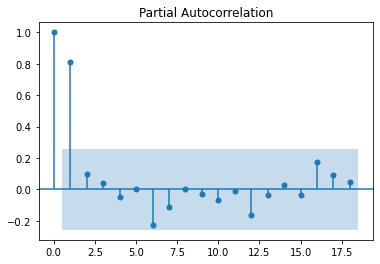

In [6]:
# acf, pacf 그리기

plot_acf(ts)
plot_pacf(ts)
plt.show()

# 결과해석
# ACF : 첫 번째 구간(영향력 미치는 구간), 그 외 실내공간(영향력 없음)
# PACF: 첫 번째 구간(영향력 미치는 구간), 그 외 실내공간(영향력 없음)

<AxesSubplot:xlabel='2016-05-25'>

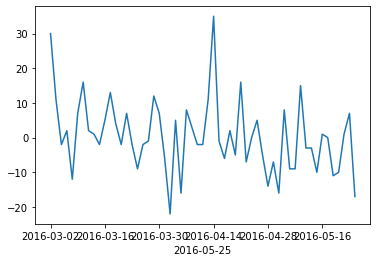

In [7]:
# 차분 곡선 그래프 (1차 차분)
# diff 차분

diff_1 = ts.diff(periods=1).iloc[1:]
diff_1.plot()

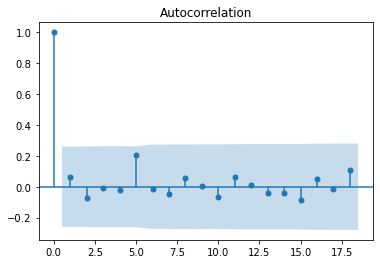

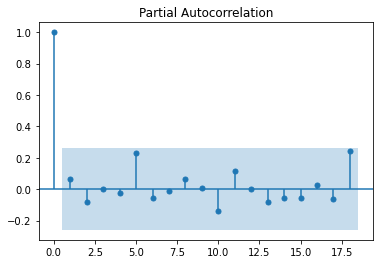

In [8]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()
# 결과해석
# ACF 하나(자기 자신) 제외, 나머지는 실내공간에 포진
# PACF 하나(자기 자신) 제외, 나머지는 실내공간에 포진

In [9]:
# 차분의 차분 그래프 그리기
diff_diff_1 = diff_1.diff(periods=1).iloc[1:]

<AxesSubplot:xlabel='2016-05-25'>

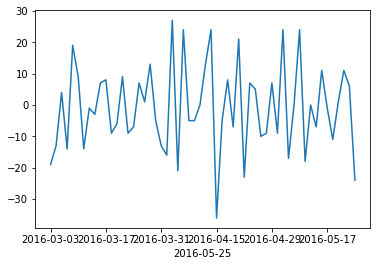

In [10]:
diff_diff_1.plot()

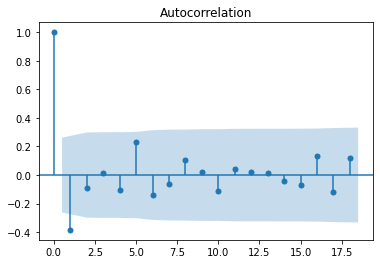

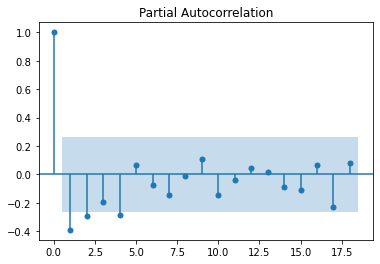

In [11]:
plot_acf(diff_diff_1)
plot_pacf(diff_diff_1)
plt.show()

In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order = (1,2,1)) # (q, d, q) : 차분을 두번 (d를 2로 설정)
fitted_model = model.fit(trend = 'c', full_output = True, disp = 1)

# trend 방법을 정해줘야 한다. ('c' or 'nc') = incluede constant or no constant

print(fitted_model.summary())

# 결과해석
# P>|z| (p-value) : ar 모델이 안 좋네 p밸류를 보고 판단 버리자!

                             ARIMA Model Results                              
Dep. Variable:                D2.1961   No. Observations:                   56
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -210.960
Method:                       css-mle   S.D. of innovations             10.101
Date:                Tue, 22 Feb 2022   AIC                            429.920
Time:                        13:28:54   BIC                            438.022
Sample:                             2   HQIC                           433.061
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1982      0.084     -2.349      0.019      -0.363      -0.033
ar.L1.D2.1961     0.0301      0.144      0.209      0.834      -0.252       0.313
ma.L1.D2.1961    -1.0000      0.050    -

C:\Users\rkdtk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rkdtk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [13]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order = (0,2,1)) # (q, d, q) : 차분을 두번 (d를 2로 설정)
fitted_model = model.fit(trend = 'c', full_output = True, disp = 1)

# trend 방법을 정해줘야 한다. ('c' or 'nc') = incluede constant or no constant

print(fitted_model.summary())

# 나는 p-value 정상으로 나오지만 만약 cont p-value가 유의하지 않다면 c --> nc로 변경한다.

C:\Users\rkdtk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rkdtk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                             ARIMA Model Results                              
Dep. Variable:                D2.1961   No. Observations:                   56
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -210.982
Method:                       css-mle   S.D. of innovations             10.100
Date:                Tue, 22 Feb 2022   AIC                            427.964
Time:                        13:28:54   BIC                            434.040
Sample:                             2   HQIC                           430.320
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1961      0.081     -2.411      0.016      -0.355      -0.037
ma.L1.D2.1961    -1.0000      0.050    -19.930      0.000      -1.098      -0.902
                                    Root

In [14]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order = (0,2,1)) # (q, d, q) : 차분을 두번 (d를 2로 설정)
fitted_model = model.fit(trend = 'nc', full_output = True, disp = 1)

# trend 방법을 정해줘야 한다. ('c' or 'nc') = incluede constant or no constant

print(fitted_model.summary())

C:\Users\rkdtk\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rkdtk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                             ARIMA Model Results                              
Dep. Variable:                D2.1961   No. Observations:                   56
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -212.865
Method:                       css-mle   S.D. of innovations             10.652
Date:                Tue, 22 Feb 2022   AIC                            429.730
Time:                        13:28:54   BIC                            433.781
Sample:                             2   HQIC                           431.301
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ma.L1.D2.1961    -0.9180      0.060    -15.242      0.000      -1.036      -0.800
                                    Roots                                    
                  Real          Imaginary   

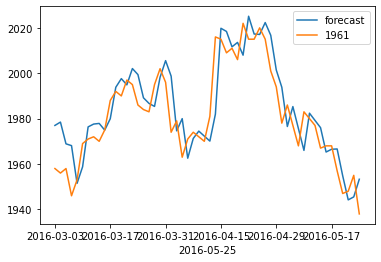

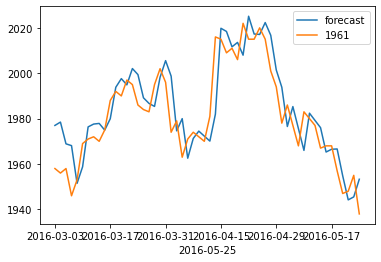

In [15]:
fitted_model.plot_predict()

In [16]:
# 예측
# 1단계 시점(t+!) 예측

fore = fitted_model.forecast(steps=1)
print(fore)

(array([1935.02892032]), array([10.65165966]), array([[1914.152051  , 1955.90578963]]))


In [18]:
fore_3 = fitted_model.forecast(steps=3)
print(fore_3)

(array([1935.02892032, 1932.05784063, 1929.08676095]), array([10.65165966, 15.69382692, 20.0010606 ]), array([[1914.152051  , 1955.90578963],
       [1901.29850509, 1962.81717618],
       [1889.88540251, 1968.28811938]]))


In [19]:
fore_5 = fitted_model.forecast(steps=5)
print(fore_5)

(array([1935.02892032, 1932.05784063, 1929.08676095, 1926.11568126,
       1923.14460158]), array([10.65165966, 15.69382692, 20.0010606 , 24.00466402, 27.86338077]), array([[1914.152051  , 1955.90578963],
       [1901.29850509, 1962.81717618],
       [1889.88540251, 1968.28811938],
       [1879.06740432, 1973.16395821],
       [1868.53337878, 1977.75582438]]))


In [17]:
fore_10 = fitted_model.forecast(steps=10)
print(fore_10)

(array([1935.02892032, 1932.05784063, 1929.08676095, 1926.11568126,
       1923.14460158, 1920.1735219 , 1917.20244221, 1914.23136253,
       1911.26028284, 1908.28920316]), array([10.65165966, 15.69382692, 20.0010606 , 24.00466402, 27.86338077,
       31.65441645, 35.42108903, 39.1899192 , 42.97811201, 46.79728581]), array([[1914.152051  , 1955.90578963],
       [1901.29850509, 1962.81717618],
       [1889.88540251, 1968.28811938],
       [1879.06740432, 1973.16395821],
       [1868.53337878, 1977.75582438],
       [1858.13200571, 1982.21503808],
       [1847.77838342, 1986.62650101],
       [1837.42053235, 1991.04219271],
       [1827.02473119, 1995.4958345 ],
       [1816.5682084 , 2000.01019792]]))
